# Advanced Python

## Generators

- **Iterable**: An object in Python that you can loop through (e.g., lists, strings, dictionaries). Under the hood, iterables use an iterator to traverse through items.
- **Generators**: A type of iterable, but they don't store their contents in memory. Instead, they generate items one at a time and only when requested, which makes them more memory-efficient than traditional iterables.

### Traditional List Creation

In [3]:
# range(100)
# list(range(100))

def make_list(num):
    result = []
    for i in range(num): 
        result.append(i*2)
    return result

my_list = make_list(100)
print(my_list)
print(list(range(10000)))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


### Generator Function Example

Instead of returning a full list at once, you can use a generator to yield items one by one:

In [13]:

def generator_function(num):
    for i in range(num):
        yield i*2

g = generator_function(100)
next(g)
print(next(g))

# for item in generator_function(1000):
#     print(item)



2


- The `yield` statement turns a function into a generator, allowing it to produce a sequence of results over time rather than computing them all at once.

In [17]:
def special_for(iterable):
    iterator = iter(iterable)
    while True:
        try:
            # print(iterator)
            print(next(iterator)*2)
        except StopIteration:
            break

special_for([1,2,3])

2
4
6


In [21]:
class MyGen():
    current = 0
    def __init__(self, first, last):
        self.first = first
        self.last = last
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if MyGen.current < self.last:
            num = MyGen.current
            MyGen.current += 1
            return num
        raise StopIteration

    
gen = MyGen(0, 100)
for i in gen:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### Fibonacci Numbers Using Generators and Lists

The Fibonacci sequence is a series of numbers where each number is the sum of the two preceding ones, usually starting with 0 and 1.

#### Generator Approach

Using a generator to produce Fibonacci numbers one at a time:

In [53]:
def fib(number):
    n1 = 0 
    n2 = 1
    for i in range(number):
        yield n1
        temp = n1
        n1 = n2
        n2 = temp + n1

for x in fib(20):
    print(x)

0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


- **Explanation**:  
  - The `fib` function uses `yield` to produce Fibonacci numbers one at a time.
  - This is memory-efficient because it doesn't store the entire sequence in memory, just the current state.

#### List Approach

Using a list to store and return all Fibonacci numbers at once:

In [55]:
def fib2(number):
    n1= 0
    n2 = 1
    result = []
    for i in range(number):
        result.append(n1)
        temp = n1
        n1 = n2
        n2 = temp + n1
    return result
    
print(fib2(20))


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


- **Explanation**:  
  - The `fib2` function calculates the Fibonacci sequence and stores all the numbers in a list, which is returned at the end.
  - This method uses more memory than the generator approach because it stores the entire sequence in memory.

#### Key Differences

- **Memory Usage**: The generator (`fib`) is more memory-efficient as it generates each number on demand, while the list-based approach (`fib2`) stores all the numbers in memory.
- **Use Case**: Use a generator when you need to process Fibonacci numbers on the fly or when working with a large number of elements. Use the list approach if you need to access all the numbers at once, especially in a small sequence.

### Benefits of Generators

- **Memory Efficiency**: Since generators produce one item at a time, they are more memory-efficient than lists.
- **Performance**: Generators are faster to create because they don't generate all items upfront. They are particularly useful for working with large datasets.

Generators are a powerful feature in Python, enabling efficient and clean handling of iterables, especially when dealing with large data or when you need to optimize memory usage.

# Having Fun :)

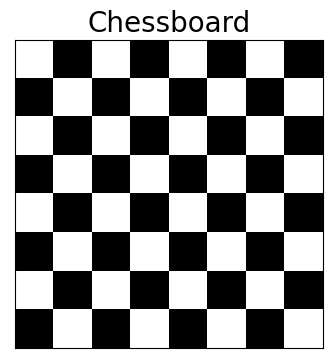

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def draw_chessboard():
    chessboard = np.ones((8, 8))
    chessboard[1::2, ::2] = 0
    chessboard[::2, 1::2] = 0

    plt.figure(figsize=(4,4))
    plt.imshow(chessboard, cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.title('Chessboard', fontsize=20)
    plt.show()

draw_chessboard()

----------------------------------------------

$$ Thank \space you \space ♡ $$
$$ Ashraf \space Sobh $$